In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose

warnings.filterwarnings("ignore")

cardox_df = pd.read_csv('cardox.csv')
# Попередній аналіз даних
cardox_df

,date,value
0,1958-03-01,315.71
1,1958-04-01,317.45
2,1958-05-01,317.50
3,1958-06-01,317.10
4,1958-07-01,315.86
...,...,...
724,2018-07-01,408.71
725,2018-08-01,406.99
726,2018-09-01,405.51
727,2018-10-01,406.00


In [2]:
cardox_df.describe()

,value
count,729.000000
mean,353.787229
std,27.547500
min,312.660000
25%,328.570000
50%,351.410000
75%,375.990000
max,411.240000


In [3]:
cardox_df.describe(include="all")

,date,value
count,729,729.000000
unique,729,NaN
top,1958-03-01,NaN
freq,1,NaN
mean,NaN,353.787229
std,NaN,27.547500
min,NaN,312.660000
25%,NaN,328.570000
50%,NaN,351.410000
75%,NaN,375.990000


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 729 entries, 1958-03-01 to 2018-11-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   729 non-null    float64
dtypes: float64(1)
memory usage: 11.4 KB


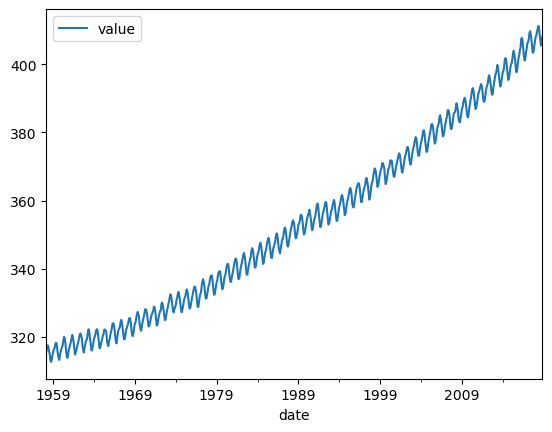

MSE: 137.25192951372944


In [5]:
cardox_df = pd.read_csv('cardox.csv')
# Перетворюємо 'date' в datetime об'єкт

cardox_df['date'] = pd.to_datetime(cardox_df['date'])
cardox_df.set_index('date', inplace=True)

# Попередній аналіз даних
cardox_df.info()
cardox_df.plot()
plt.show()

# Видалити рядки з пропущеними значеннями
cardox_df = cardox_df.dropna()

# Декомпозиція даних
decomposed = seasonal_decompose(cardox_df['value'], model='additive')
trend = decomposed.trend
seasonality = decomposed.seasonal
residuals = decomposed.resid

# Диференціювання даних
diff_values = cardox_df['value'].diff()
seasonal_diff_values = cardox_df['value'].diff(12)

# Коригування тренду та сезонності
smoothed_values = cardox_df['value'].ewm(alpha=0.2, adjust=False).mean()
rolling_mean = cardox_df['value'].rolling(window=12).mean()

# Вибір моделі ARIMA та оцінка її метрик
model = ARIMA(cardox_df['value'], order=(5,1,0))
model_fit = model.fit()
mse = mean_squared_error(cardox_df['value'], model_fit.fittedvalues)
print('MSE:', mse)

# Прогнозування на 30 років
n_forecast = 30 * 12
forecast = model_fit.forecast(steps=n_forecast)[0]

# Збереження результатів прогнозування в файл
forecast_df = pd.DataFrame({'Prediction': forecast}, index=pd.date_range(start=cardox_df.index[-1], periods=n_forecast+1, freq='M')[1:])
forecast_df.to_csv('forecast.csv')


